In [14]:
# import standard modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Topic 1 - Averaging data to reduce uncertainty

## Motivation

Consider an experiment to measure a quantity, $x$. If this experiment is run many times under "identical" conditions, we would not expect the same result to occur each time. This will be due to a host of processes
that are beyond our control, but that can be usefully modelled as random.  

Suppose that running the experiment $n$ times has resulted in values $x_{1},x_{2},\dots,x_{n}$. How can 
we best determine what value for $x$ should be used? 

## A simple statistical model

To proceed we need to formulate the problem appropriately. We assume that the result of the $i$th 
experiment takes the form

$
x_{i} = x + z_{i}, 
$

where $x$ is the true value and $z_{i}$ is a random error. We will assume that these errors 
are drawn from a normal distribution with zero mean and standard deviation $\sigma$. Equivalently, 
we can say that the $x_{i}$ are samples drawn from a normal distribution with mean $x$ and standard
deviation $\sigma$. In cases where the mean of the measurement errors are known, the
data can simply be corrected such that the data errors become zero-mean. 



## Applying an optimal estimate

To obtain an estimate, $\hat{x}$, of $x$ from the data, an obvious thing to do is form the 
arithmetic mean

$
\hat{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i}.
$

Errors within the data propagate through to the estimate $\hat{x}$. We
should, therefore, think about $\hat{x}$ itself as a sample drawn of a random variable.
It can be shown that this random variable is normally distributed with mean $x$ and 
standard deviation

$\sigma_{\hat{x}} = \frac{\sigma}{\sqrt{n}}$. 

Thus, by averaging, have
reduced the uncertainty on the measurements by a factor of $\sqrt{n}$. 

Interestingly, the statements about the mean and standard deviation
of $\hat{x}$ do not require the data errors to be normally distributed. If, however, 
the error distribution is very far from normal, the criteria under which the 
estimate is deemed optimal become less meaningful.

It can be shown that this arithmetic mean is the **optimal estimator** for this 
problem in the following sense. All all **unbiased** estimators, it is the one with 
the smallest standard deviation. That the estimator is unbiased means that its 
expected value is equal to that of the parameter we wish to determine.

Having discussed the basic method, we can see how this can be applied within the following code. 


In [15]:
# Define a simple function that tests the estimator
# so that it can be run repeatedly
def TestArithmeticMean(x,sigma,n):
    X = stats.norm(loc = x, scale = sigma)
    data = X.rvs(n)
    return np.average(data), sigma/np.sqrt(n)
    

# Set the parameter values and compute the result
x = 2
sigma = 0.1
n = 10
estimate , std = TestArithmeticMean(x,sigma,n)
print("Estimated value = %7.4f" % (estimate))
print("Standard deviation of estimator = %7.4f" % (std))

Estimated value =  2.0395
Standard deviation of estimator =  0.0316


You can experiment with the code above, changing the value of the parameters to see how the performance varies. 

To be more systematic, we can run the estimator many times using data sets generated using the 
same parmaters and plot a histogram of the results.

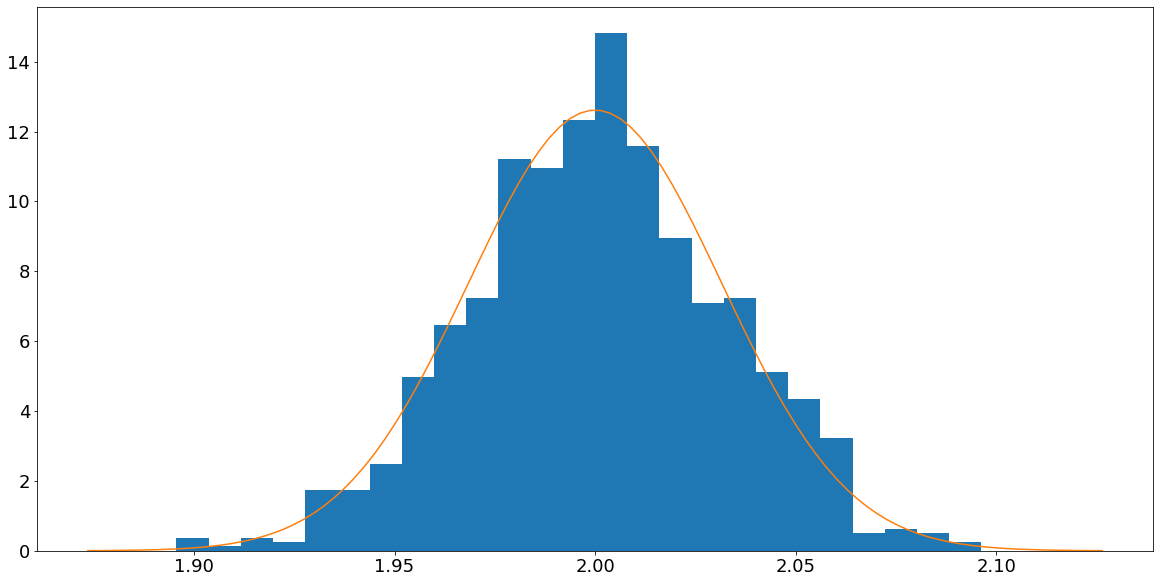

In [16]:
# Run the estimator many times and store the results
nRuns = 1000
estimates = []
for run in range(nRuns):
    estimate, std =  TestArithmeticMean(x,sigma,n)
    estimates.append(estimate)
    
# Plot the estimated values as a histogram
plt.hist(estimates,int(nRuns/40),density = True)

# Plot also the PDF for a normal distribution with the claimed parameters
pdf = stats.norm(x,std).pdf
xx = np.linspace(x-4*std,x+4*std,100)
yy = pdf(xx)
plt.plot(xx,yy)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()   

## 


## Accounting for variable data errors

In practice, the errors associated with our measurements may not all be the same. In this case, we
need to use a **weighted mean** to get the optimal result. We write $\sigma_{i}$ for the 
standard deviation of the $i$th datum. We can then define the following estimator

$
\hat{x} = \frac{1}{\sum_{j=1}^{n}\frac{1}{\sigma_{j}^{2}}} \sum_{i=1}^{n} \frac{x_{i}}{\sigma_{i}^{2}}.
$

The first thing to note here is that if the standard deviations are all the same, then this formula does 
reduce to the usual arithmetic mean. The next is to observe that within the summation, the $i$th data
is weighted by its inverse variance $\sigma_{i}^{-2}$. This makes sense, as we want data that are less
certain to be down-weighted. It can be shown that the standard deviation for this estimator is

$
\sigma_{\hat{x}} = \sqrt{\frac{1}{\sum_{j=1}^{n}\frac{1}{\sigma_{j}^{2}}}}.
$

It can be verified that this value is at smaller than any of the $\sigma_{i}$, and hence there is 
always a benefit to averaging data. 

The situation considered here is not the most general that arises in practice. It has been implicitly assumed in the above discussion that the errors on our measurements are independent. If this were not the case, it would be necessary to deal with the **covariance matrix** for the errors, and there exists a further generalisation of the formula for the optimal estimator. 

The calculation of weighted means can also be done with the `numpy` function `average` used above. All we 
need do is provide a vector  `weights` as an optional argument. Details about this function can be found
here: https://numpy.org/doc/stable/reference/generated/numpy.average.html. As an exercise, you might write some code to implement and test this method. 

